In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Normalize pixel values
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

In [ ]:
# One-hot encode the labels
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)
y_train_full.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# Split training set into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000, 10), (12000, 10))

In [ ]:
#Method to build model based on activation function
def build_model(activation_fn):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_fn),
        Dense(64, activation=activation_fn),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


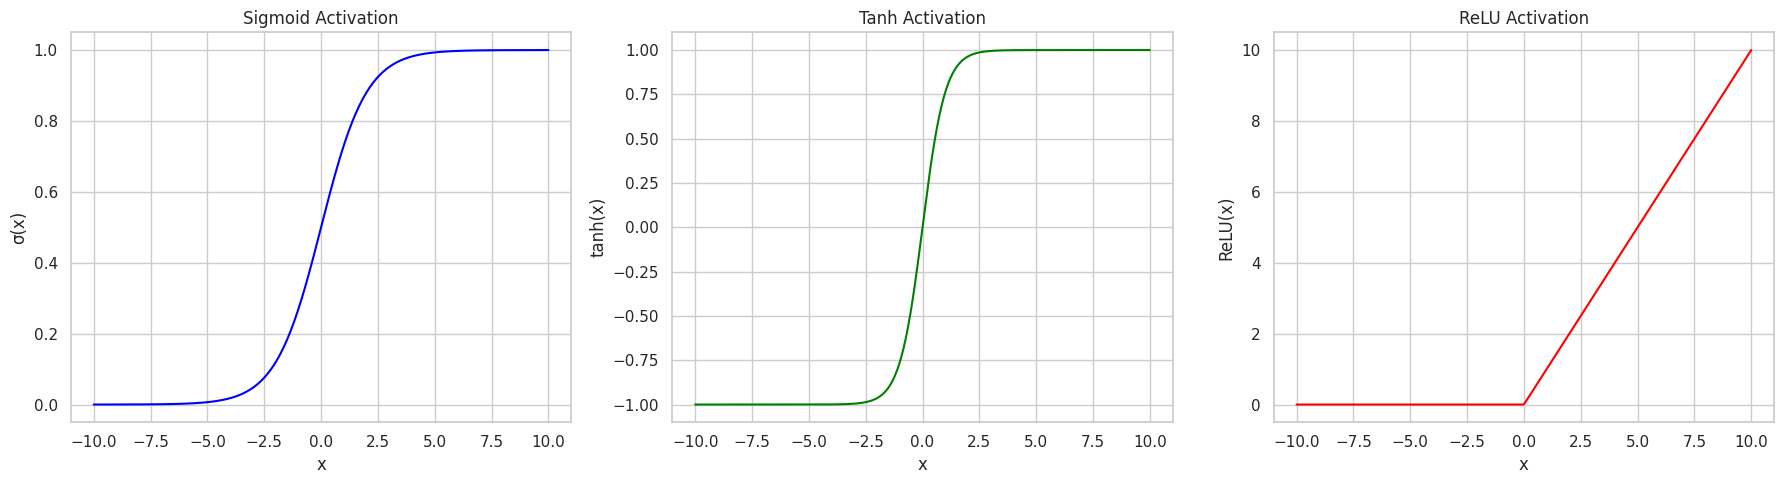

In [ ]:
# Define activation functions
x = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

# Plot all three in subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Sigmoid plot
axs[0].plot(x, sigmoid, color='blue')
axs[0].set_title("Sigmoid Activation")
axs[0].set_xlabel("x")
axs[0].set_ylabel("σ(x)")
axs[0].grid(True)

# Tanh plot
axs[1].plot(x, tanh, color='green')
axs[1].set_title("Tanh Activation")
axs[1].set_xlabel("x")
axs[1].set_ylabel("tanh(x)")
axs[1].grid(True)

# ReLU plot
axs[2].plot(x, relu, color='red')
axs[2].set_title("ReLU Activation")
axs[2].set_xlabel("x")
axs[2].set_ylabel("ReLU(x)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train with ReLU
model_relu = build_model('relu')
history_relu = model_relu.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val),batch_size=128, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train with Sigmoid
model_sigmoid = build_model('sigmoid')
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val),batch_size=128, verbose=0)

In [ ]:
# Train with Tanh
model_tanh = build_model('tanh')
history_tanh = model_tanh.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val),batch_size=128, verbose=0)

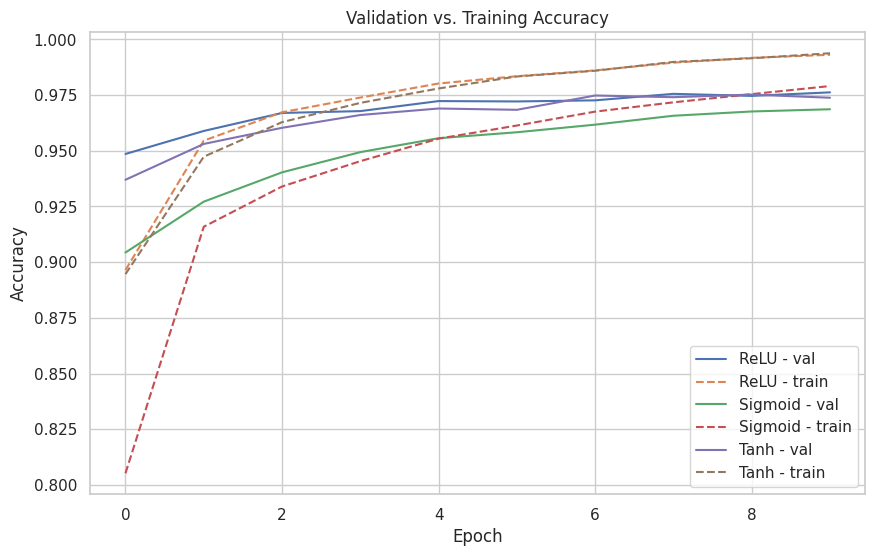

In [ ]:
def plot_accuracies(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} - val')
        plt.plot(history.history['accuracy'], linestyle='--', label=f'{label} - train')
    plt.title('Validation vs. Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracies(
    [history_relu, history_sigmoid, history_tanh],
    ['ReLU', 'Sigmoid', 'Tanh']
)


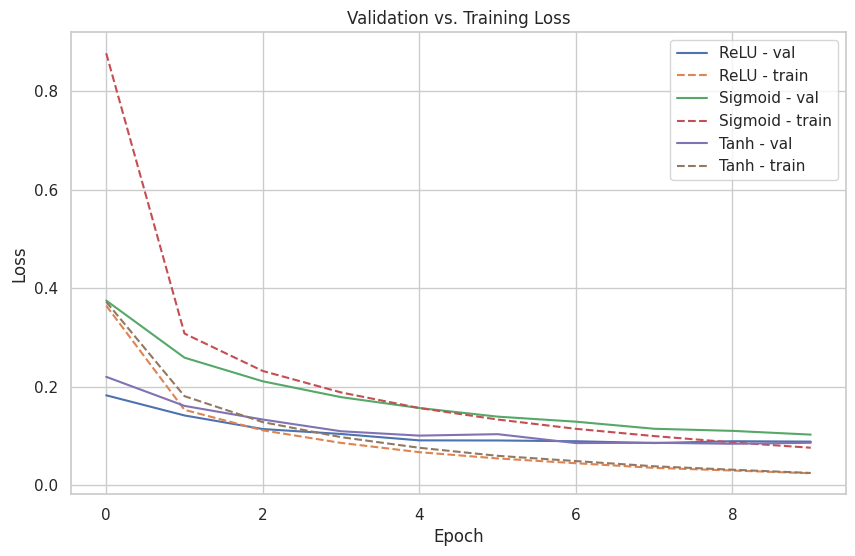

In [ ]:
def plot_losses(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label} - val')
        plt.plot(history.history['loss'], linestyle='--', label=f'{label} - train')
    plt.title('Validation vs. Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function
plot_losses(
    [history_relu, history_sigmoid, history_tanh],
    ['ReLU', 'Sigmoid', 'Tanh']
)


In [ ]:
# Evaluate models on the test set
test_results = {}

for name, model in zip(['ReLU', 'Sigmoid', 'Tanh'],
                       [model_relu, model_sigmoid, model_tanh]):
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_results[name] = {'Test Accuracy': acc, 'Test Loss': loss}

# Display results
for act, result in test_results.items():
    print(f"{act}: Accuracy = {result['Test Accuracy']:.4f}, Loss = {result['Test Loss']:.4f}")


ReLU: Accuracy = 0.9758, Loss = 0.0875
Sigmoid: Accuracy = 0.9692, Loss = 0.1002
Tanh: Accuracy = 0.9750, Loss = 0.0847


In [ ]:
def plot_confusion(model, x_test, y_test, title):
    # Predict class probabilities
    y_pred_probs = model.predict(x_test)

    # Convert one-hot encoded to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

    # Plot
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


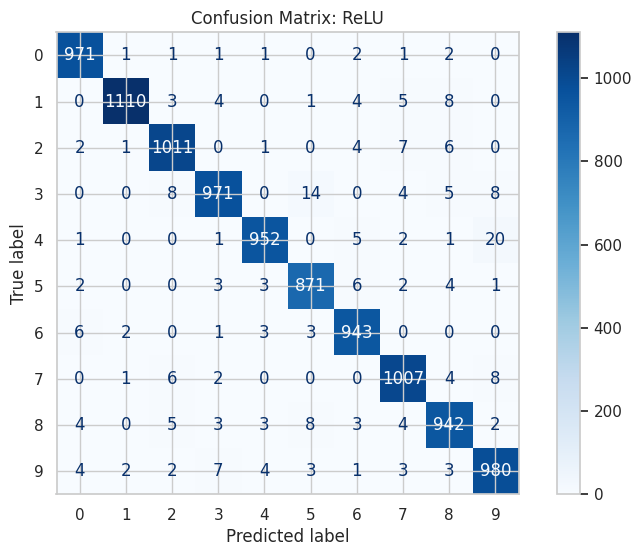

In [ ]:
plot_confusion(model_relu, x_test, y_test, 'ReLU')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


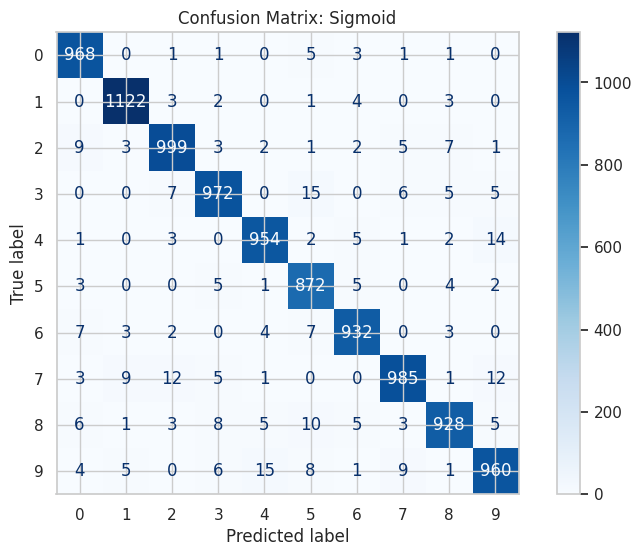

In [ ]:
plot_confusion(model_sigmoid, x_test, y_test, 'Sigmoid')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


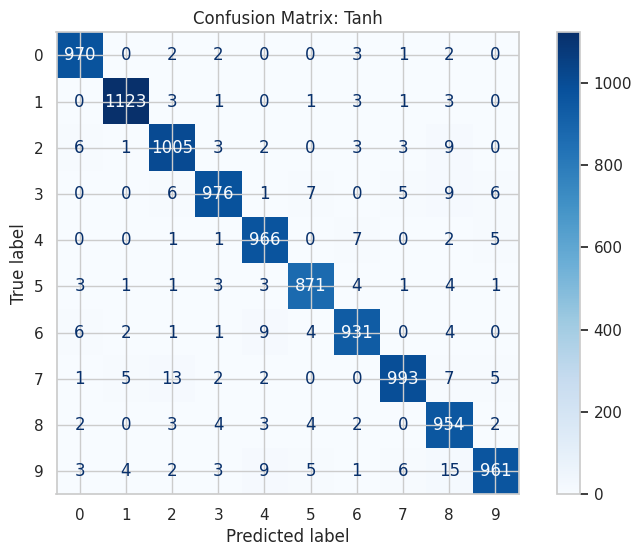

In [ ]:
plot_confusion(model_tanh, x_test, y_test, 'Tanh')